In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import math
%pylab inline
from sklearn.metrics import pairwise_distances
import matplotlib.colors as mcolors
import itertools
import sys

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'draw', 'seed', 'power', 'diff', 'linalg', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
sys.path.append("../CODE") # add code folder
from NNO_util_minh import *

In [23]:
def run_pagerank_save_iterations(x0,T,Al,N):
    x=x0.copy()
    previous_r = x
    X = np.zeros((T,N))
    for i in range(0,T):
        X[i,:] = x
        x = x*Al
        x = x/sum(x)
        
    return X

def compute_Bottleneck_kNN(T,X):
    bottle_distances_kNN = zeros(T)
    nodes=rowvect2D(X[-1])
    FINAL_neighbor_order_matrix = neighbor_ordering(nodes,'max')
    FINAL_diag_kNN=dist2PD(FINAL_neighbor_order_matrix,1,13)[1]
    for t in range(T):
        nodes=rowvect2D(X[t])
        neighbor_order_matrix = neighbor_ordering(nodes,'max')
        diag_kNN=dist2PD(neighbor_order_matrix,1,13)[1]
        bottle_distances_kNN[t] = bottleneck(diag_kNN,FINAL_diag_kNN)[0]
        bottle_distances_kNN[t] = bottle_distances_kNN[t] * (bottle_distances_kNN[t]>10**(-16))
    return bottle_distances_kNN
    
    
def compute_Bottleneck_kNN_min(T,X):
    bottle_distances_kNN_min = zeros(T)
    nodes=rowvect2D(X[-1])
    FINAL_neighbor_order_matrix_min = neighbor_ordering(nodes,'min')
    FINAL_diag_kNN_min=dist2PD(FINAL_neighbor_order_matrix_min,1,13)[1]
    for t in range(T):
        nodes=rowvect2D(X[t])
        neighbor_order_matrix_min = neighbor_ordering(nodes,'min')
        diag_kNN_min=dist2PD(neighbor_order_matrix_min,1,13)[1]
        bottle_distances_kNN_min[t] = bottleneck(diag_kNN_min,FINAL_diag_kNN_min)[0]
        bottle_distances_kNN_min[t] = bottle_distances_kNN_min[t] * (bottle_distances_kNN_min[t]>10**(-16))
    return bottle_distances_kNN_min

def iter_to_conv(X):
    diff_X = array([ norm(X[t] - X[-1]) for t in range(len(X))] )
    diff_ranks = np.sum(abs(ranks - ranks[-1])>0,1)
    iters_to_convergence = where(diff_ranks>0)[0][-1]
    return iters_to_convergence

def ranks(X):
    ranks = zeros(shape(X))
    for t in range(len(X)):
        ranks[t] = argsort(-X[t])
    return ranks

def diff(X):
    diff_X = array([ norm(Xt - X[-1]) for Xt in X ])
    r = ranks(X)
    diff_ranks = np.sum( abs(r-r[-1]) > 0 ,1 )    
    return diff_X,diff_ranks

In [24]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=measures.values(),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

# Study kNN homology convergence for Erdos Renyi networks

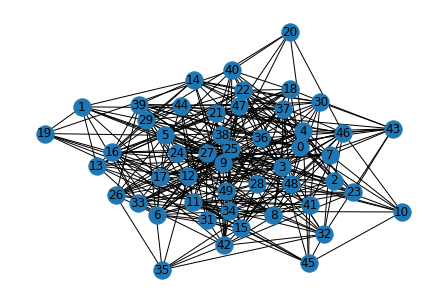

In [25]:
def ER_gr(n,p):
    return nx.erdos_renyi_graph(n,p)

n = 50
p = 0.25
seed = 22126
ER_graph = ER_gr(n,p)
pos = nx.spring_layout(ER_graph,seed=seed)
nx.draw(ER_graph,pos=pos,with_labels=True)
plt.show()

In [26]:
def run_PR_ER(N=100,p=0.2,T=80):
    ER = ER_gr(N,p)
    Al = nx.google_matrix(ER, alpha=0.85, personalization=None, nodelist=None, weight='weight', dangling=None)
    x0 = linspace(2,3,N) 
    x0 = x0.T/sum(x0)
    X=run_pagerank_save_iterations(x0,T,Al,N)
    return X

In [27]:
T=30
X = run_PR_ER(T,.5)
compute_Bottleneck_kNN(T,X)

array([3.5, 3. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

N= 20 p= 0.1
N= 20 p= 0.2
N= 20 p= 0.4
N= 50 p= 0.1
N= 50 p= 0.2
N= 50 p= 0.4
N= 100 p= 0.1
N= 100 p= 0.2
N= 100 p= 0.4
N= 200 p= 0.1
N= 200 p= 0.2
N= 200 p= 0.4


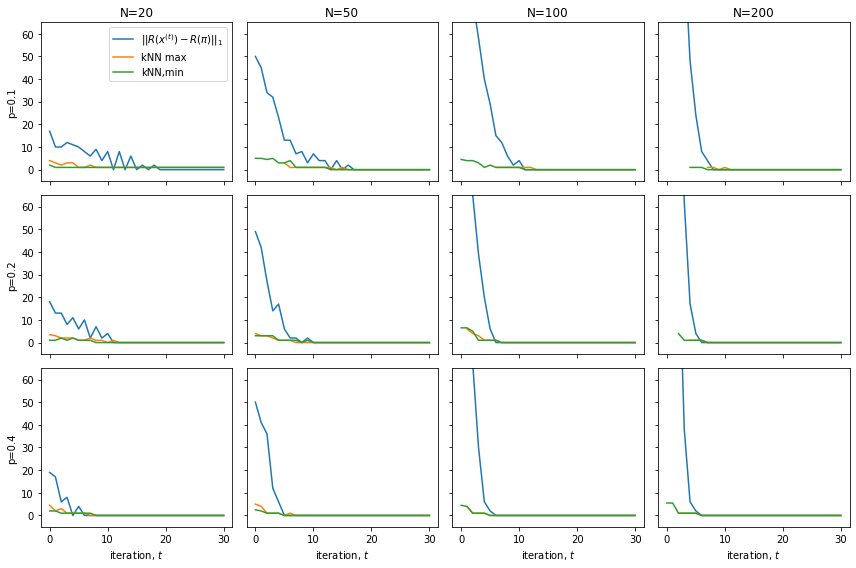

In [35]:
Ns = [20,50,100,200]
#Ns = [50,51,52,53]
ps = [.1,.2,.4]


f1,ax = plt.subplots(len(ps),len(Ns),figsize=(12,8),sharex=True,sharey=True)
T = 50

its = arange(31)


for j,N in enumerate(Ns):
    for i,p in enumerate(ps):    
        print('N=',N,'p=',p)
        
        X = run_PR_ER(N,p,T)

        diffs = diff(X)
        ax[i,j].plot(diffs[1][its])
        ax[i,j].plot(compute_Bottleneck_kNN(T,X)[its])
        ax[i,j].plot(compute_Bottleneck_kNN_min(T,X)[its])
        ax[i,j].set_ylim([-5,65])
        #ax[i,j].set_title('N='+str(25)+',p='+str(p))

#ax[0,0].legend(['$||R(x^{(t)}) -R(\pi)||_1$','$d(D_{kNN,max}(x^{(t)}),D_{kNN,max}(\pi))$',
#                    '$d(D_{kNN,min}(x^{(t)}),D_{kNN,min}(\pi))$'],loc='upper right')

ax[0,0].legend(['$||R(x^{(t)}) -R(\pi)||_1$','kNN max', 'kNN,min'],loc='upper right')


for i,p in enumerate(ps):      
    ax[i,0].set_ylabel('p='+str(p))#+'\n\n Disc. Topo. Conv.')

    
for j,N in enumerate(Ns):
#    ax[0,j].set_ylabel('p='+str(p)+'\n'+)
    ax[0,j].set_title('N='+str(N))
    ax[-1,j].set_xlabel('iteration, $t$')


f1.tight_layout()#pad=0.7)
plt.savefig('ER_parameters.pdf')

# Study kNN homology convergence for Small World networks

In [29]:
def SW_gr(N=50,k=4,p=.1):
    return nx.watts_strogatz_graph(N,k,p)

def run_PR_SW(N=50,k=4,p=.1,T=40):
    
    SW = SW_gr(N,k,p)
    Al = nx.google_matrix(SW, alpha=0.85, personalization=None, nodelist=None, weight='weight', dangling=None)
    N=len(Al)
    x0 = linspace(2,3,N) #* np.random.rand()
    x0 = x0.T/sum(x0)
    X=run_pagerank_save_iterations(x0,T,Al,N)
    return X

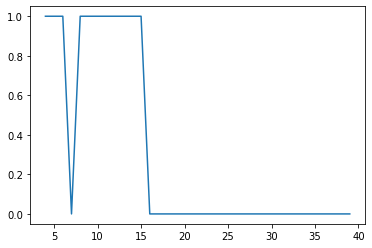

In [30]:
T = 40
X = run_PR_SW(50,4,0.9,T)
plt.plot(compute_Bottleneck_kNN_min(T,X))

N= 20 p= 0.05
N= 20 p= 0.1
N= 20 p= 0.2
N= 50 p= 0.05
N= 50 p= 0.1
N= 50 p= 0.2
N= 100 p= 0.05
N= 100 p= 0.1
N= 100 p= 0.2
N= 200 p= 0.05
N= 200 p= 0.1
N= 200 p= 0.2


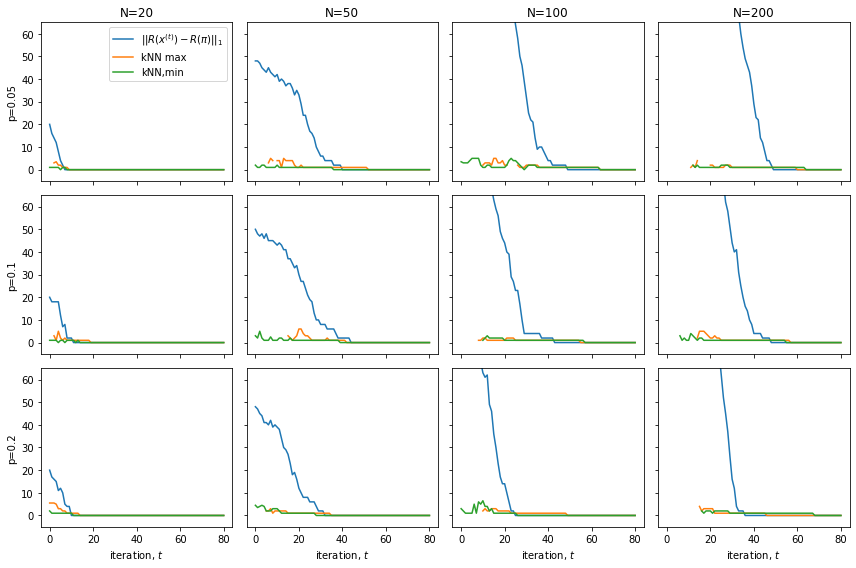

In [31]:
Ns = [20,50,100,200]
#Ns = [50,51,52,53]
ps = [.05,.1,.2]


f1,ax = plt.subplots(len(ps),len(Ns),figsize=(12,8),sharex=True,sharey=True)
T = 100

its = arange(81)


for j,N in enumerate(Ns):
    for i,p in enumerate(ps):    
        print('N=',N,'p=',p)
        
        X = run_PR_SW(N,4,p,T)

        diffs = diff(X)
        ax[i,j].plot(diff(X)[1][its])
        ax[i,j].plot(compute_Bottleneck_kNN(T,X)[its])
        ax[i,j].plot(compute_Bottleneck_kNN_min(T,X)[its])
        ax[i,j].set_ylim([-5,65])

ax[0,0].legend(['$||R(x^{(t)}) -R(\pi)||_1$','kNN max', 'kNN,min'],loc='upper right')


for i,p in enumerate(ps):      
    ax[i,0].set_ylabel('p='+str(p))#+'\n disc. topo. conv.')
    ax[-1,j].set_xlabel('iteration, $t$')
    
    
for j,N in enumerate(Ns):
    ax[0,j].set_title('N='+str(N) )
    ax[-1,j].set_xlabel('iteration, $t$')


f1.tight_layout()
plt.savefig('SW_parameters.pdf')

# Study kNN homology convergence for Barabasi Albert networks

In [32]:
def SF_gr(N,m):
    return nx.barabasi_albert_graph(N,m)

def run_PR_SF(N=25,m=3,T=80):
    SF = SF_gr(N,m)
    Al = nx.google_matrix(SF, alpha=0.85, personalization=None, nodelist=None, weight='weight', dangling=None)
    x0 = linspace(2,3,N) #* np.random.rand()
    x0 = x0.T/sum(x0)
    X=run_pagerank_save_iterations(x0,T,Al,N)
    return X

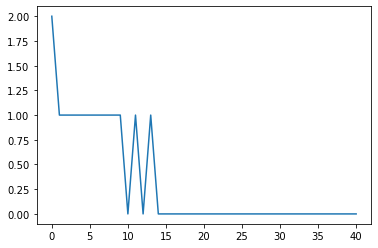

In [33]:
T=60
its = arange(41)
plt.plot(its,(compute_Bottleneck_kNN_min(T,run_PR_SF(25,3)))[its])

N= 20 m= 2
N= 20 m= 4
N= 20 m= 6
N= 50 m= 2
N= 50 m= 4
N= 50 m= 6
N= 100 m= 2
N= 100 m= 4
N= 100 m= 6
N= 200 m= 2
N= 200 m= 4
N= 200 m= 6


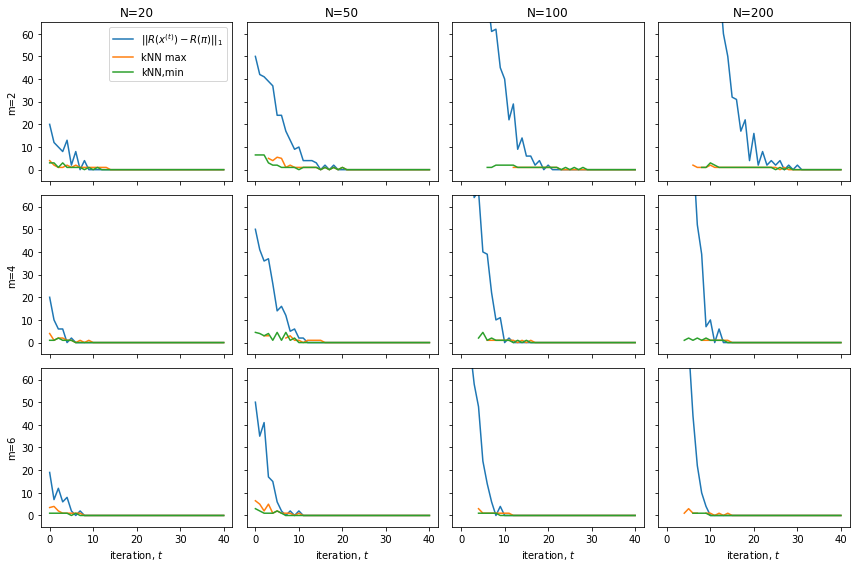

In [34]:
Ns = [20,50,100,200]
#Ns = [50,51,52,53]
ms = [2,4,6]

f1,ax = plt.subplots(len(ms),len(Ns),figsize=(12,8),sharex=True,sharey=True)
T = 60

its = arange(41)

for j,N in enumerate(Ns):
    for i,m in enumerate(ms):
        print('N=',N,'m=',m)
        
        X = run_PR_SF(N,m,T)

        diffs = diff(X)
        ax[i,j].plot(diff(X)[1][its])
        ax[i,j].plot(compute_Bottleneck_kNN(T,X)[its])
        ax[i,j].plot(compute_Bottleneck_kNN_min(T,X)[its])
        ax[i,j].set_ylim([-5,65])
        
ax[0,0].legend(['$||R(x^{(t)}) -R(\pi)||_1$','kNN max', 'kNN,min'],loc='upper right')


for i,m in enumerate(ms):      
    ax[i,0].set_ylabel('m='+str(m))#+'\n disc. topo. conv.')
    ax[-1,j].set_xlabel('iteration, $t$')
    
    
for j,N in enumerate(Ns):
#    ax[0,j].set_ylabel('p='+str(p)+'\n'+)
    ax[0,j].set_title('N='+str(N) )
    ax[-1,j].set_xlabel('iteration, $t$')


f1.tight_layout()
plt.savefig('SF_parameters.pdf')